In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd 

In [2]:
# import utilities
# data = utilities.load_data('data_multivar.txt')
lol_champions = pd.read_csv("data/LoL_champions.csv",header=0)

lol_champions.head()

# num_clusters = 4

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


In [14]:
lol_champions

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.00,0.00,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.00,0.80,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.00,0.00,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.20,0.70,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.50,0.80,62,3.75,2.125,0.625,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Zeri,Marksman,Bottom,Ranged,Mana,600,110,250,45.0,330,...,500,3.25,0.70,6.00,0.80,56,2.00,2.000,0.658,0.625
163,Ziggs,Mage,"Bottom,Middle",Ranged,Mana,606,106,480,23.5,325,...,550,6.50,0.60,8.00,0.80,55,3.10,2.000,0.656,0.656
164,Zilean,"Support,Mage",Support,Ranged,Mana,574,96,452,50.0,335,...,550,5.50,0.50,11.35,0.80,52,3.00,2.130,0.658,0.625
165,Zoe,Mage,Middle,Ranged,Mana,630,106,425,25.0,340,...,550,7.50,0.60,8.00,0.65,58,3.30,2.500,0.658,0.625


In [3]:
lol_champions.describe()

,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,Base armor,Armor per lvl,Base magic resistance,Magic resistance per lvl,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,617.856287,104.059880,313.586826,36.712575,336.155689,29.886228,4.64521,30.760479,1.684731,328.023952,6.297904,0.658084,8.124551,0.574251,58.856287,3.193962,2.536677,0.652275,0.636533
std,39.468040,8.687133,122.071293,19.780376,7.060817,6.400696,0.51391,1.701203,0.379112,193.318326,1.904721,0.151530,7.964615,0.296610,5.665660,0.656317,0.890675,0.035445,0.066561
min,410.000000,69.000000,0.000000,0.000000,325.000000,18.000000,0.00000,22.000000,1.100000,125.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.475000,0.000000
25%,595.500000,99.000000,280.000000,25.500000,330.000000,25.000000,4.42500,30.000000,1.300000,125.000000,5.500000,0.550000,6.500000,0.400000,55.000000,3.000000,2.000000,0.625000,0.625000
50%,625.000000,104.000000,330.000000,40.000000,335.000000,30.000000,4.70000,30.000000,1.550000,175.000000,6.500000,0.600000,7.500000,0.700000,59.000000,3.100000,2.500000,0.651000,0.638000
75%,645.000000,109.000000,392.500000,50.000000,340.000000,34.000000,4.95000,32.000000,2.050000,525.000000,8.000000,0.750000,8.000000,0.800000,63.000000,3.500000,3.200000,0.667000,0.658000
max,696.000000,129.000000,530.000000,87.000000,355.000000,47.000000,5.50000,39.000000,2.550000,650.000000,10.000000,1.250000,50.000000,1.000000,69.000000,5.000000,6.000000,0.850000,0.850000


In [10]:
def get_top_bottom_values(df):
    result = []
    for col in df.columns:
        print(col)
        # Get top 2 max values (with their original indices, if needed)
        row_with_max = lol_champions.nlargest(2, col)
        print("\nUsing nlargest(2):")
        print(row_with_max)
        
        max_values = df[col].nlargest(2).reset_index(drop=True)  # Reset index to ignore original positions
        #print(max_values)
        
        # Get bottom 2 min values
        row_with_min = lol_champions.nsmallest(2, col)
        print("\nUsing nsmallest(2):")
        print(row_with_min)
        print("\n============================")
        min_values = df[col].nsmallest(2).reset_index(drop=True)
        #print(min_values)
        # Combine into a single Series with labels for max/min ranks
        combined = pd.concat([
            pd.Series(max_values, index=['max1', 'max2']),
            pd.Series(min_values, index=['min1', 'min2'])
        ])
        print(combined)
        result.append(combined)
    # Stack results into a DataFrame (columns = original columns, rows = max/min ranks)
    return pd.DataFrame(result, index=df.columns).T

In [11]:
top_bottom_df = get_top_bottom_values(lol_champions.iloc[:,5:])
print("\nTop 2 Max and Bottom 2 Min Values for Each Column:\n", top_bottom_df)


Base HP

Using nlargest(2):
           Name              Tags Role Range type Resourse type  Base HP  \
136  Tryndamere  Fighter,Assassin  Top      Melee          Fury      696   
36        Garen      Fighter,Tank  Top      Melee           NaN      690   

     HP per lvl  Base mana  Mana per lvl  Movement speed  ...  Attack range  \
136         108        100           0.0             345  ...           175   
36           98          0           0.0             340  ...           175   

     HP regeneration  HP regeneration per lvl  Mana regeneration  \
136              8.5                      0.9                0.0   
36               8.0                      0.5                0.0   

     Mana regeneration per lvl  Attack damage  Attack damage per lvl  \
136                        0.0             66                    4.0   
36                         0.0             69                    4.5   

     Attack speed per lvl  Attack speed  AS ratio  
136                  3.40      

In [12]:
lol_champions_cn_v=lol_champions.iloc[:,5:]


[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


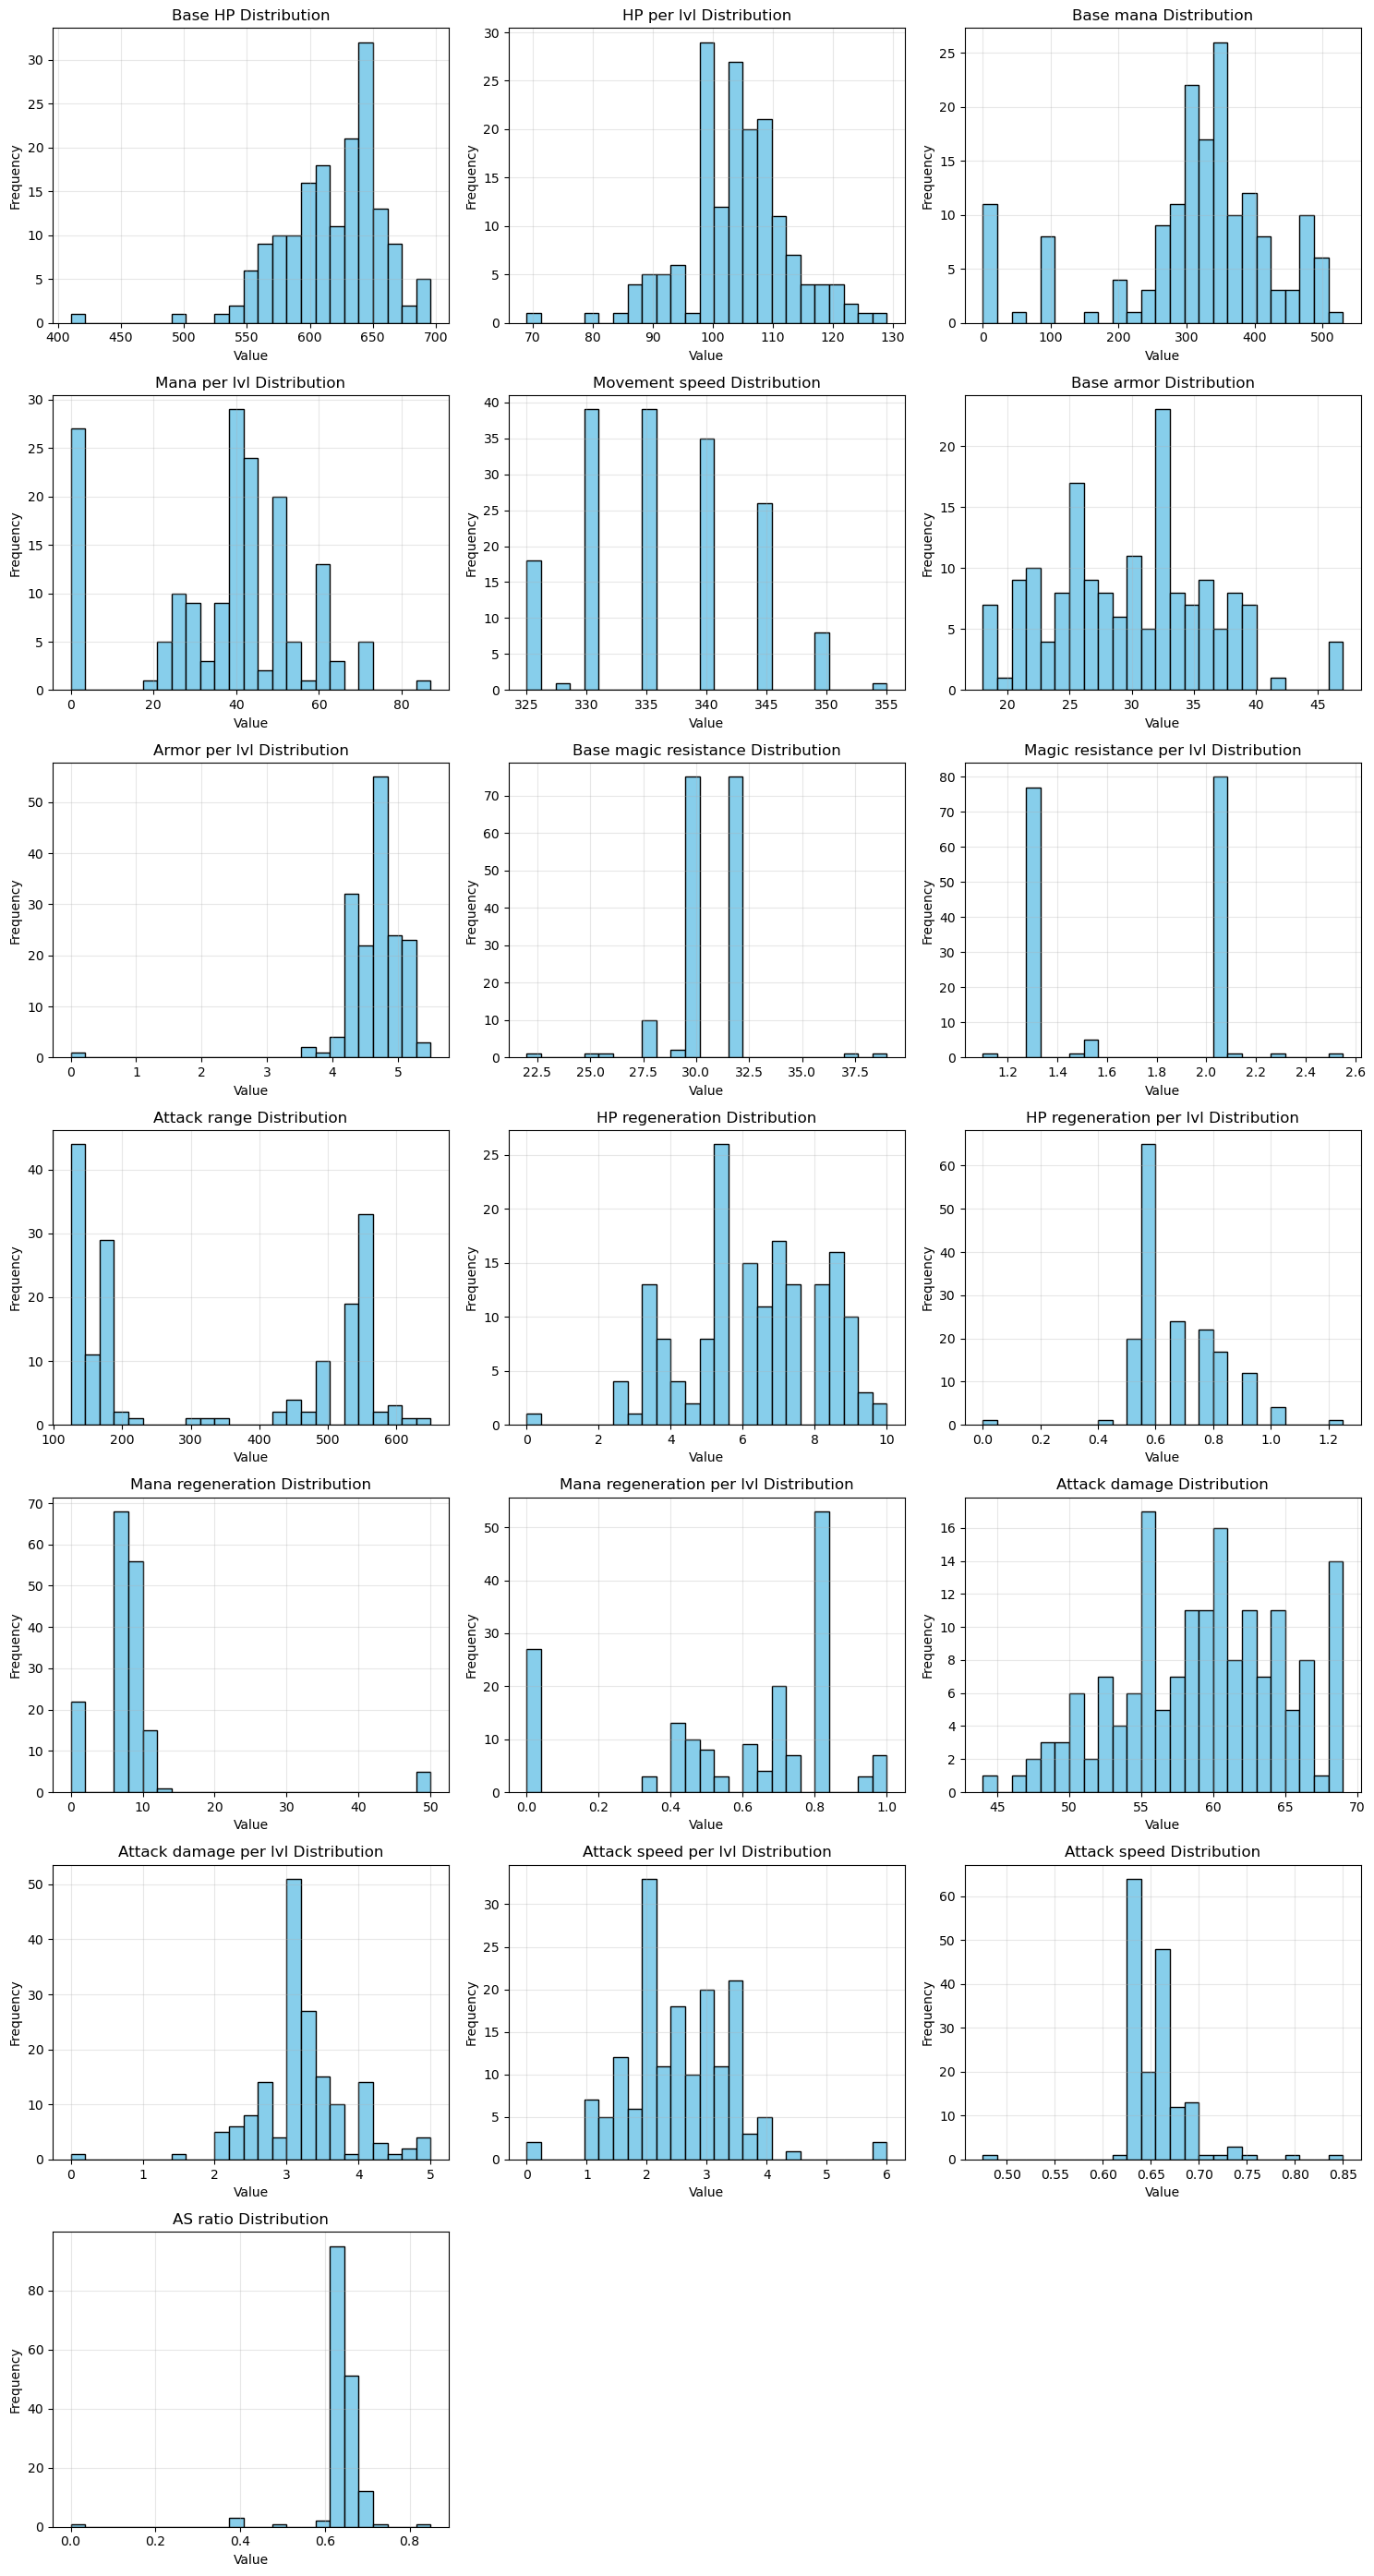

In [15]:
#Method 2: Using Matplotlib Directly (More Customization)
import numpy as np
import matplotlib.pyplot as plt

# Set up subplots
n_cols = lol_champions_cn_v.shape[1]

# 计算合适的子图行数和列数（例如：每行最多显示 3 列，避免横向过长）
n_rows = (n_cols + 2) // 3  # 向上取整，确保列数能被行数整除
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 4 * n_rows))  # 动态调整高度

print(axes)

# 处理子图为一维数组（适用于列数不足 n_rows*3 的情况）
axes = axes.flatten()  # 将二维数组展平为一维，方便循环遍历
print(axes)

# Plot histograms for each column
for i, col in enumerate(lol_champions_cn_v.columns):
    ax = axes[i]
    ax.hist(lol_champions_cn_v[col], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# 隐藏多余的子图（如果列数不足 n_rows*3）
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Adjust spacing and display
plt.tight_layout()
plt.show()


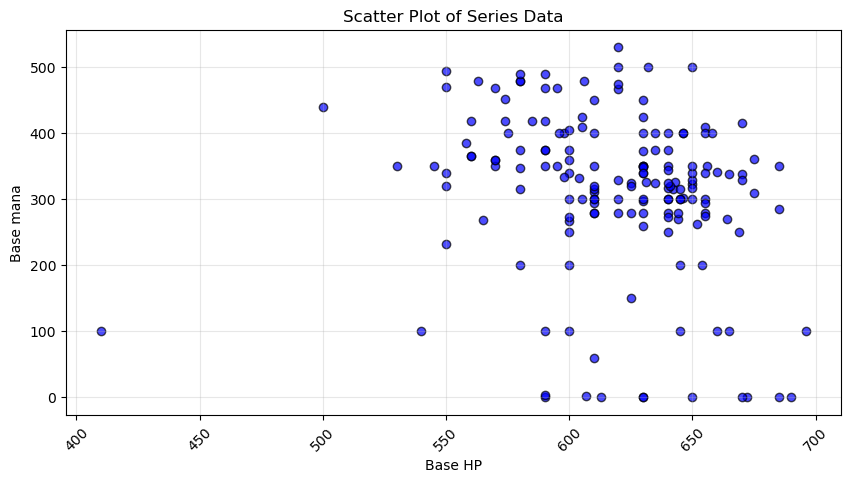

In [18]:
#Case 1: Scatter Plot (Index vs. Values)

import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample Series (e.g., random values with a datetime index)
# index = pd.date_range(start="2023-01-01", periods=30, freq="D")
# data = pd.Series(np.random.randn(30), index=index)

# Plot as a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x=lol_champions_cn_v["Base HP"], y=lol_champions_cn_v["Base mana"], color="blue", alpha=0.7, edgecolor="black")  # alpha for transparency


plt.xlabel("Base HP")
plt.ylabel("Base mana")
plt.title("Scatter Plot of Series Data")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (if index is text/datetime)
plt.grid(True, alpha=0.3)

plt.show()

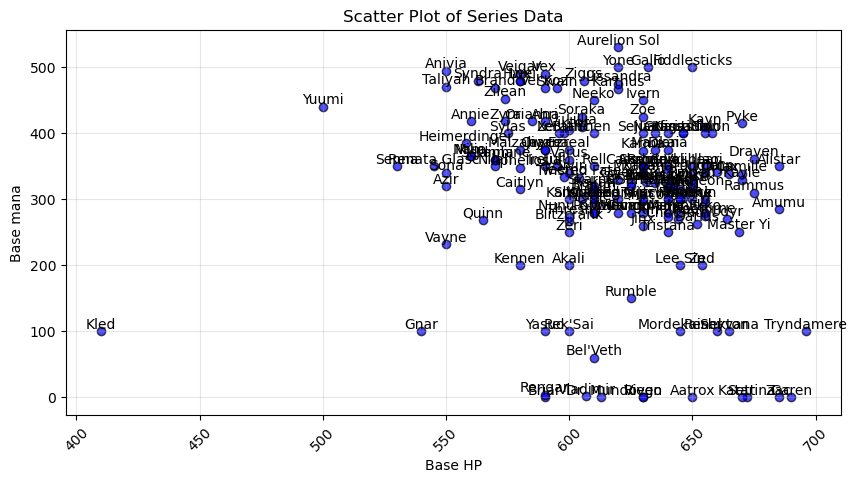

In [20]:
#Case 1: Scatter Plot (Index vs. Values)

import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample Series (e.g., random values with a datetime index)
# index = pd.date_range(start="2023-01-01", periods=30, freq="D")
# data = pd.Series(np.random.randn(30), index=index)

# Plot as a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x=lol_champions_cn_v["Base HP"], y=lol_champions_cn_v["Base mana"], color="blue", alpha=0.7, edgecolor="black")  # alpha for transparency

# Add string labels to each point
for i in range(len(lol_champions_cn_v)):
    plt.text(
        x=lol_champions['Base HP'].iloc[i],       # X position of the point
        y=lol_champions['Base mana'].iloc[i],       # Y position of the point
        s=lol_champions['Name'].iloc[i],    # String label (e.g., 'Alice')
        ha='center',             # Horizontal alignment: center the text above the point
        va='bottom',             # Vertical alignment: place text below the point (adjust as needed)
        fontsize=10,
        color='black'              # Text color (optional)
    )

plt.xlabel("Base HP")
plt.ylabel("Base mana")
plt.title("Scatter Plot of Series Data")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (if index is text/datetime)
plt.grid(True, alpha=0.3)

plt.show()

In [21]:
filtered_df = lol_champions[lol_champions['Base mana'] <= 10]
print(filtered_df)

          Name              Tags                Role Range type Resourse type  \
0       Aatrox           Fighter                 Top      Melee    Blood Well   
17       Briar  Fighter,Assassin              Jungle      Melee          Fury   
26   Dr. Mundo      Tank,Fighter                 Top      Melee           NaN   
36       Garen      Fighter,Tank                 Top      Melee           NaN   
58    Katarina     Assassin,Mage              Middle      Melee           NaN   
106     Rengar  Assassin,Fighter          Jungle,Top      Melee      Ferocity   
107      Riven  Fighter,Assassin                 Top      Melee           NaN   
114       Sett      Fighter,Tank                 Top      Melee          Grit   
147      Viego  Fighter,Assassin              Jungle      Melee           NaN   
149   Vladimir      Mage,Fighter          Middle,Top     Ranged  Crimson Rush   
160        Zac      Tank,Fighter  Jungle,Top,Support      Melee           NaN   

     Base HP  HP per lvl  B

In [31]:
filtered_df = lol_champions[lol_champions['Mana per lvl'] <= 1]
print(filtered_df["Name"])

	

0           Aatrox
2            Akali
13        Bel'Veth
17           Briar
26       Dr. Mundo
36           Garen
37            Gnar
58        Katarina
61          Kennen
64            Kled
68         Lee Sin
81     Mordekaiser
102        Rek'Sai
105       Renekton
106         Rengar
107          Riven
108         Rumble
114           Sett
116           Shen
117        Shyvana
136     Tryndamere
147          Viego
149       Vladimir
156          Yasuo
157           Yone
160            Zac
161            Zed
Name: Name, dtype: object


In [48]:
filtered_df = lol_champions[lol_champions["HP regeneration"] <2]
filtered_df
# lol_champions['HP regeneration']

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
17,Briar,"Fighter,Assassin",Jungle,Melee,Fury,590,95,0,0.0,340,...,125,0.0,0.0,0.0,0.0,60,3.0,2.0,0.644,0.669


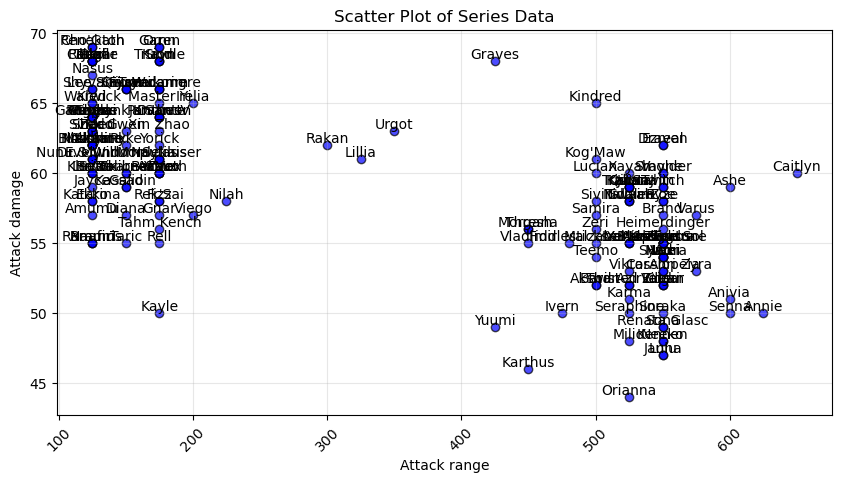

In [49]:
#Case 1: Scatter Plot (Index vs. Values)

import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample Series (e.g., random values with a datetime index)
# index = pd.date_range(start="2023-01-01", periods=30, freq="D")
# data = pd.Series(np.random.randn(30), index=index)

# Plot as a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x=lol_champions_cn_v["Attack range"], y=lol_champions_cn_v["Attack damage"], color="blue", alpha=0.7, edgecolor="black")  # alpha for transparency

# Add string labels to each point
for i in range(len(lol_champions_cn_v)):
    plt.text(
        x=lol_champions['Attack range'].iloc[i],       # X position of the point
        y=lol_champions['Attack damage'].iloc[i],       # Y position of the point
        s=lol_champions['Name'].iloc[i],    # String label (e.g., 'Alice')
        ha='center',             # Horizontal alignment: center the text above the point
        va='bottom',             # Vertical alignment: place text below the point (adjust as needed)
        fontsize=10,
        color='black'              # Text color (optional)
    )

plt.xlabel("Attack range")
plt.ylabel("Attack damage")
plt.title("Scatter Plot of Series Data")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (if index is text/datetime)
plt.grid(True, alpha=0.3)

plt.show()

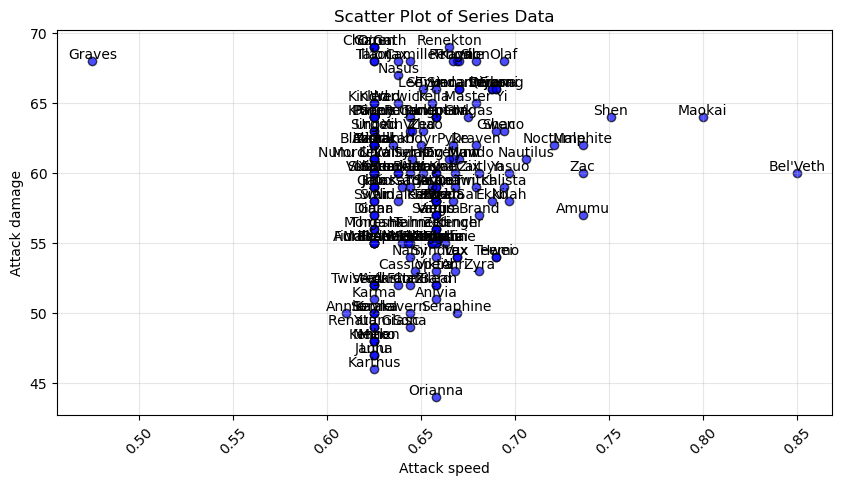

In [51]:
#Case 1: Scatter Plot (Index vs. Values)

import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample Series (e.g., random values with a datetime index)
# index = pd.date_range(start="2023-01-01", periods=30, freq="D")
# data = pd.Series(np.random.randn(30), index=index)

# Plot as a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x=lol_champions_cn_v["Attack speed"], y=lol_champions_cn_v["Attack damage"], color="blue", alpha=0.7, edgecolor="black")  # alpha for transparency

# Add string labels to each point
for i in range(len(lol_champions_cn_v)):
    plt.text(
        x=lol_champions['Attack speed'].iloc[i],       # X position of the point
        y=lol_champions['Attack damage'].iloc[i],       # Y position of the point
        s=lol_champions['Name'].iloc[i],    # String label (e.g., 'Alice')
        ha='center',             # Horizontal alignment: center the text above the point
        va='bottom',             # Vertical alignment: place text below the point (adjust as needed)
        fontsize=10,
        color='black'              # Text color (optional)
    )

plt.xlabel("Attack speed")
plt.ylabel("Attack damage")
plt.title("Scatter Plot of Series Data")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (if index is text/datetime)
plt.grid(True, alpha=0.3)

plt.show()

In [50]:
filtered_df = lol_champions[lol_champions["Attack range"] <159]
filtered_df
# lol_champions['HP regeneration']

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.0,0.90,50.00,0.00,62,3.30,3.200,0.625,0.625
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.5,0.85,8.50,0.80,62,3.75,2.125,0.625,0.625
5,Amumu,"Tank,Support","Jungle,Support",Melee,Mana,685,94,285,40.0,335,...,125,9.0,0.85,7.40,0.55,57,3.80,2.180,0.736,0.638
14,Blitzcrank,"Tank,Support",Support,Melee,Mana,600,109,267,40.0,325,...,125,7.5,0.75,8.50,0.80,62,3.50,1.130,0.625,0.625
16,Braum,"Tank,Support",Support,Melee,Mana,610,112,311,45.0,335,...,125,8.5,1.00,7.00,0.80,55,3.20,3.500,0.644,0.644
17,Briar,"Fighter,Assassin",Jungle,Melee,Fury,590,95,0,0.0,340,...,125,0.0,0.00,0.00,0.00,60,3.00,2.000,0.644,0.669
19,Camille,"Fighter,Assassin","Top,Support",Melee,Mana,670,99,339,52.0,340,...,125,8.5,0.80,8.15,0.75,68,3.80,2.500,0.644,0.644
21,Cho'Gath,"Tank,Mage",Top,Melee,Mana,644,94,270,60.0,345,...,125,9.0,0.85,7.20,0.45,69,4.20,1.440,0.625,0.625
24,Diana,"Fighter,Assassin","Jungle,Middle",Melee,Mana,640,109,375,25.0,345,...,150,6.5,0.85,8.00,0.80,57,3.00,2.000,0.625,0.694
26,Dr. Mundo,"Tank,Fighter",Top,Melee,NaN,613,103,0,0.0,345,...,125,7.0,0.50,0.00,0.00,61,2.50,3.300,0.670,0.625
